In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r"C:\Users\sathi\Downloads\playstore_apps\googleplaystore.csv")

In [156]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


### Data Cleaning Steps: 
    1.Finding the Structural Errors
    2.Missing Value Detection
    3.DataType Conversion
    4.Outlier Detection
    5.Duplicate Detection


### 1.Finding the Structural Errors

In [10]:
for i in df1.columns:
    print(i,'\n',df1[i].unique())

App 
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category 
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Rating 
 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
Reviews 
 ['159' '967' '87510' ... '603' '1195' '398307'

In [11]:
#In category column we have one structural error i,e 1.9
# Im droping the row
df1.drop(df1[df1['Category']=='1.9'].index,inplace=True)

In [12]:
df1['Size'].replace('Varies with device','11M',inplace=True)

In [13]:
df1['Installs'].replace(',','',inplace=True,regex=True)
df1['Installs'].replace('\+','',inplace=True,regex=True)

In [14]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [15]:
df1['Price'].replace('\$','',inplace=True,regex=True)

In [16]:
df1['Android Ver'] = df1['Android Ver'].str.replace('and up','')

In [17]:
#df1['Size'].replace(['M',"K"],'',inplace=True,regex=True)

In [18]:
df1['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839     11M
10840     19M
Name: Size, Length: 10840, dtype: object

In [19]:
df1['Android Ver'].replace('Varies with device',np.nan,inplace=True)



In [20]:
df1['Current Ver'].replace('Varies with device',np.nan,inplace=True)

### 2.Missing Value Detection

In [21]:
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1467
Android Ver       1364
dtype: int64

In [22]:
df1['Rating'].fillna(df1['Rating'].mode()[0],inplace=True)

In [23]:
df1['Type'].fillna(df1['Type'].mode()[0],inplace=True)

In [24]:
df1['Android Ver'].fillna(df1['Android Ver'].mode()[0],inplace=True)

In [25]:
df1['Current Ver'].fillna(df1['Current Ver'].mode()[0],inplace=True)

### 3.DataType Conversion

In [26]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",1.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


In [28]:
df1['Reviews'] = df1['Reviews'].astype('int')

In [29]:
df1['Installs'] = df1['Installs'].astype('int')

In [30]:
df1['Price'] = df1['Price'].astype('float')

In [31]:
df1['Last Updated'] = df1['Last Updated'].astype('datetime64[ns]')

### 4.Outlier Detection

In [32]:
num = df1.select_dtypes(include=['int','float'])


In [33]:
for i in num.columns:
    print(i,'Min is: ',num[i].min(),'\n',i,'Max is: ',num[i].max())

Rating Min is:  1.0 
 Rating Max is:  5.0
Reviews Min is:  0 
 Reviews Max is:  78158306
Installs Min is:  0 
 Installs Max is:  1000000000
Price Min is:  0.0 
 Price Max is:  400.0


In [34]:
#In above column we dont have the outliers there extreme high values but those are real/true values

### 5.Duplicate Detection

In [35]:
df1[df1.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,11M,5000000,Free,0.0,Everyone,Business,2018-02-26,1.0,4.0.3
236,Box,BUSINESS,4.2,159872,11M,10000000,Free,0.0,Everyone,Business,2018-07-31,1.0,4.1
239,Google My Business,BUSINESS,4.4,70991,11M,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,11M,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,11M,10000000,Free,0.0,Everyone,Productivity,2018-04-06,1.0,4.1
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,11M,1000000,Free,0.0,Everyone,Productivity,2018-08-06,1.0,4.1
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,11M,100000000,Free,0.0,Everyone,Productivity,2018-06-27,1.0,4.1
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0


In [36]:
df1.drop_duplicates(inplace=True)

#### 1.What are the summary statistics for numerical variables (mean, median, standard deviation)?

In [37]:
num.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.220074,4.441529e+05,1.546434e+07,1.027368
std,0.484197,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.400000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


#### 2.What is the distribution of user ratings?

In [165]:
plt.style.use('ggplot')

<Axes: ylabel='Frequency'>

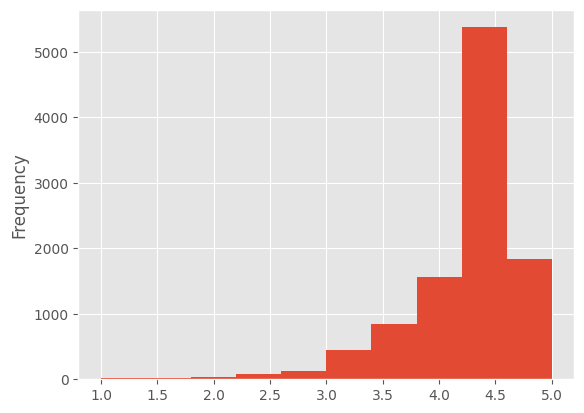

In [166]:
df1.Rating.plot.hist()

* The Distribution Rating is **Left Skewed** more data points on right

#### 3.What are the most common categories and genres of apps in the Google Play Store?

In [167]:
df1['Category'].value_counts().nlargest(10)

Category
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

In [168]:
df1['Genres'].value_counts().nlargest(10)

Genres
Tools              842
Entertainment      588
Education          527
Business           427
Medical            408
Productivity       407
Personalization    388
Lifestyle          372
Communication      366
Sports             364
Name: count, dtype: int64

#### 4.Which categories have the highest number of installations?

In [169]:
df1.groupby(by='Category')["Installs"].sum().nlargest(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

* **Game** Category has Highest number of installations

#### 5.What is the correlation between the number of reviews and the user rating?

<Axes: xlabel='Rating', ylabel='Reviews'>

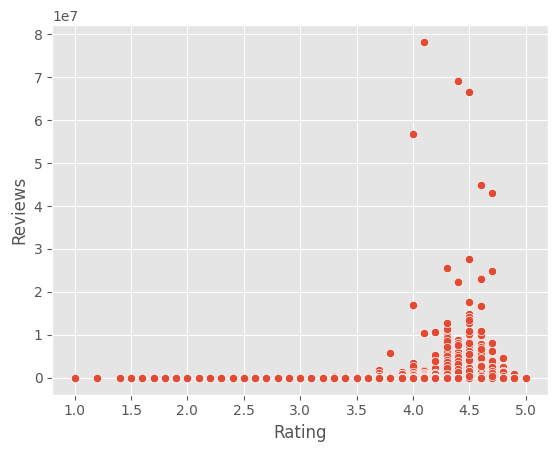

In [170]:
sns.scatterplot(df1,x='Rating',y='Reviews')

In [171]:
df1.corr(numeric_only=True)

,Rating,Reviews,Installs,Price
Rating,1.000000,0.058593,0.039363,-0.018818
Reviews,0.058593,1.000000,0.634997,-0.009417
Installs,0.039363,0.634997,1.000000,-0.011147
Price,-0.018818,-0.009417,-0.011147,1.000000


* The correlation between the number of reviews and the user rating is **Positive Weak Relationship**

#### 6.What is the distribution of free and paid apps in different categories?

<Axes: ylabel='Frequency'>

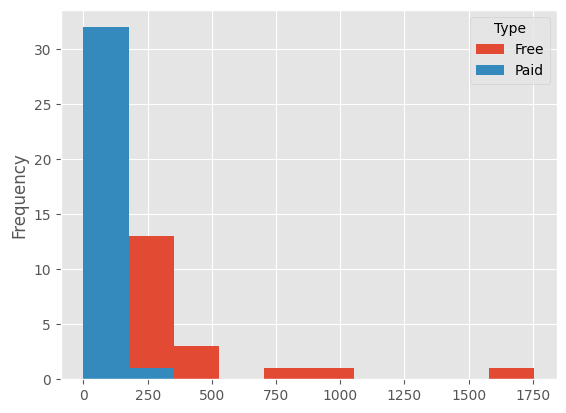

In [192]:
pd.crosstab(columns=df1['Type'],index=df1['Category']).plot.hist()

#### 7.What is the average price of paid apps within each category?

<Axes: xlabel='Category'>

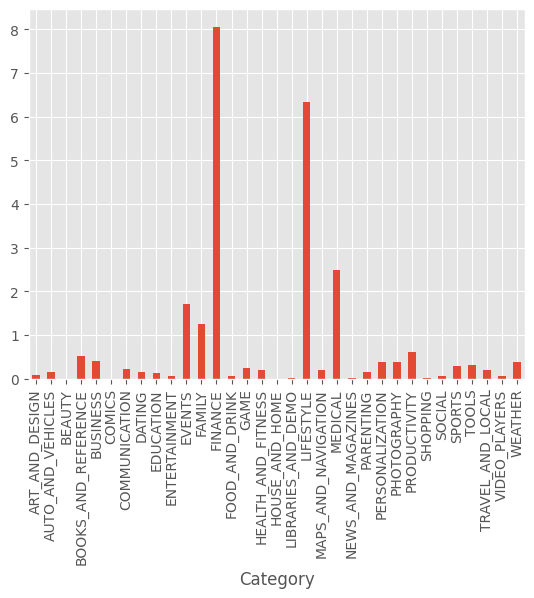

In [191]:
df1.groupby(by=['Category'])['Price'].mean().plot.bar()

#### 8.What are the top apps based on number of installs?

In [202]:
max = df1['Installs'].max()
df = df1[df1["Installs"]==max]
df.App

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
382     Messenger – Text and Video Chat for Free
386                                     Hangouts
391                Skype - free IM & video calls
411                 Google Chrome: Fast & Secure
451                                        Gmail
464                                     Hangouts
865                            Google Play Games
1654                              Subway Surfers
1700                              Subway Surfers
1750                              Subway Surfers
1872                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2604                

#### 9.What are top apps based on number of reviews?

<Axes: xlabel='App'>

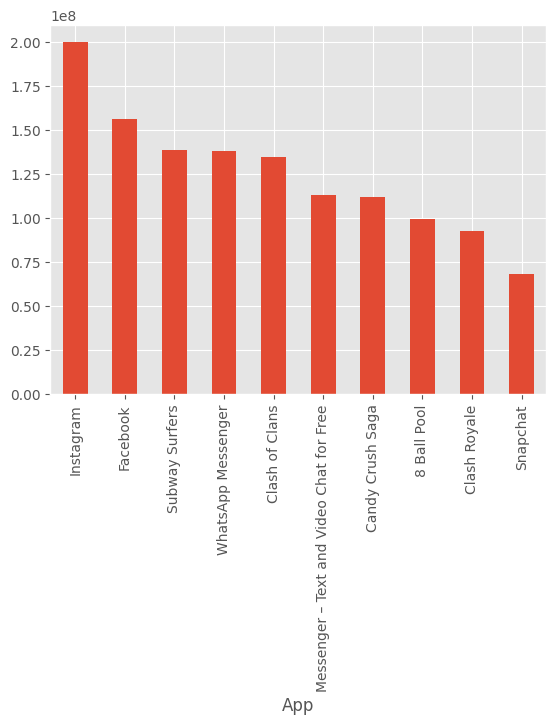

In [175]:
df1.groupby('App')['Reviews'].sum().nlargest(10).plot.bar()

#### 10.What are the top apps based on highest number of reviews and a rating above 4.5?

In [176]:
 df = df1[df1.Rating > 4.5]

<Axes: xlabel='App'>

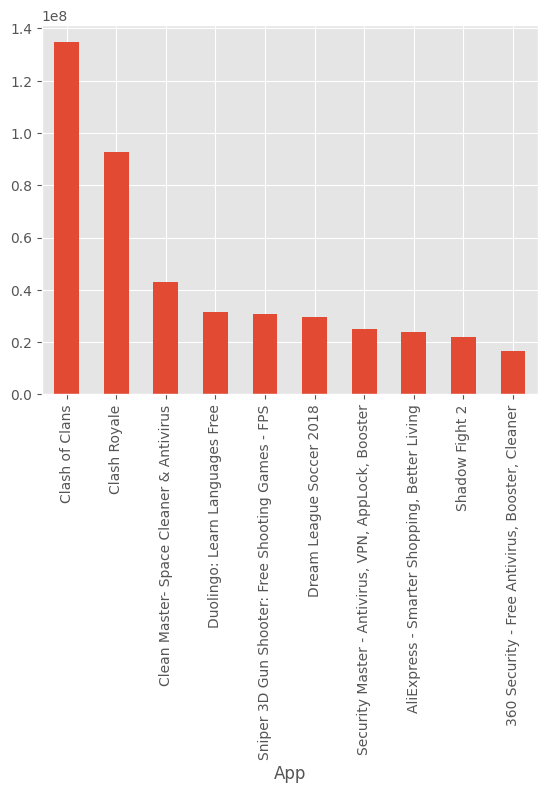

In [177]:
df.groupby('App')['Reviews'].sum().nlargest(10).plot.bar()

#### 11.What are the top 5 Categories based on highest number of Apps?

<Axes: title={'center': ' Top 5 Categories'}, xlabel='Category'>

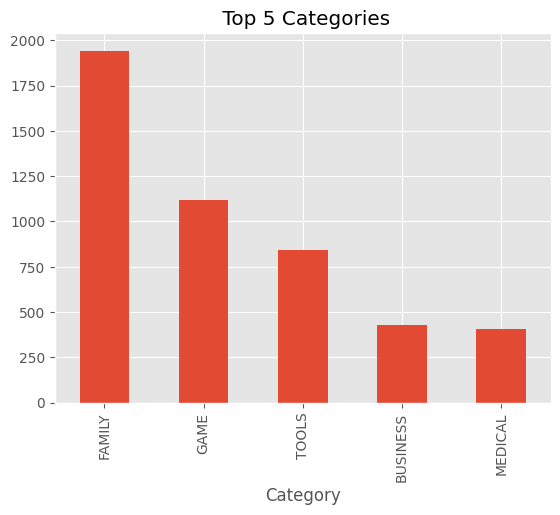

In [178]:
df1.Category.value_counts().nlargest(5).plot.bar(title=' Top 5 Categories')

#### 12.What are the top 5 Genres based on highest number of Apps?

<Axes: title={'center': 'Top 5 Genres '}, xlabel='Genres'>

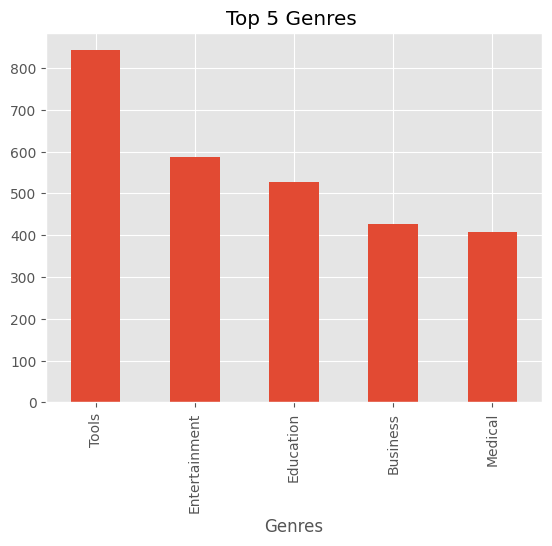

In [179]:
df1.Genres.value_counts().nlargest(5).plot.bar(title='Top 5 Genres ')

#### 13.What is the share of Free and Paid Apps?

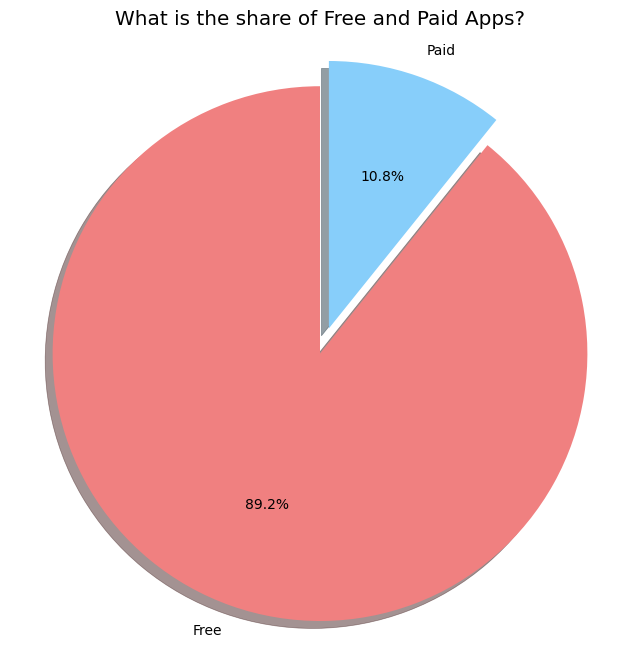

In [180]:
type_counts = df['Type'].value_counts()

# Create a color palette with softer and more contrasting colors
colors = ['lightcoral', 'lightskyblue']

# Explode the 'Free' slice for emphasis
explode = (0.1, 0)

# Plotting the pie chart with updated design choices
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('What is the share of Free and Paid Apps?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### 14.What are the top 5 Categories for Paid Apps

In [181]:
df = df1[df1.Type == 'Paid']

<Axes: title={'center': 'The top 5 Categories for Paid Apps'}, xlabel='Category'>

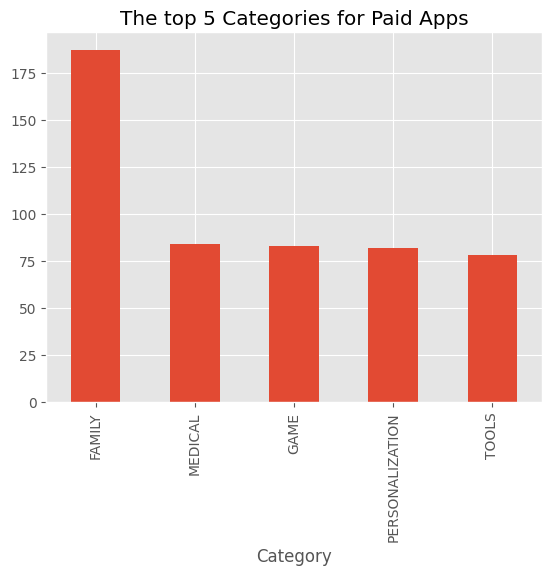

In [182]:
df.Category.value_counts().nlargest(5).plot.bar(title='The top 5 Categories for Paid Apps')

#### 15.What are the top 5 Genres for Paid Apps?

<Axes: title={'center': 'The top 5 Genres for Paid Apps'}, xlabel='Genres'>

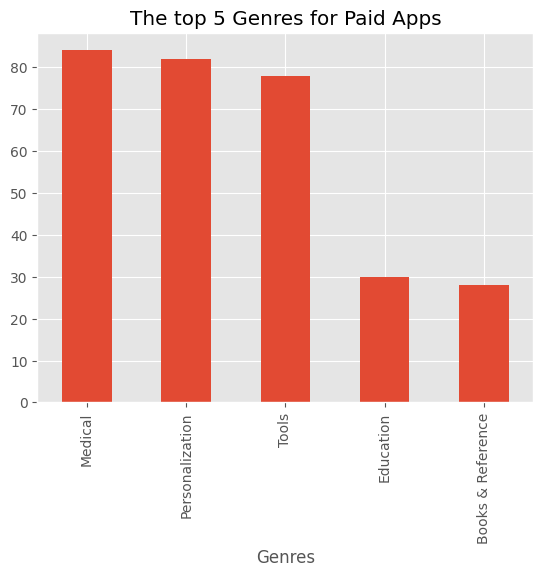

In [183]:
df.Genres.value_counts().nlargest(5).plot.bar(title='The top 5 Genres for Paid Apps')

#### 16.What type of Categories are charging more than $100

In [184]:
df = df1[df1.Price>100]

<Axes: title={'center': 'The Categories are charging more than $100'}, xlabel='Category'>

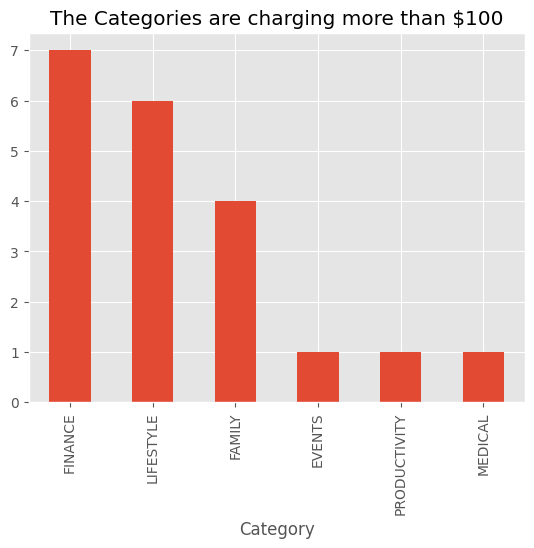

In [185]:
df['Category'].value_counts().plot.bar(title='The Categories are charging more than $100')

#### 17.What is the average price of Apps by Content Rating?

<Axes: title={'center': 'The average price of Apps by Content Rating'}, xlabel='Content Rating'>

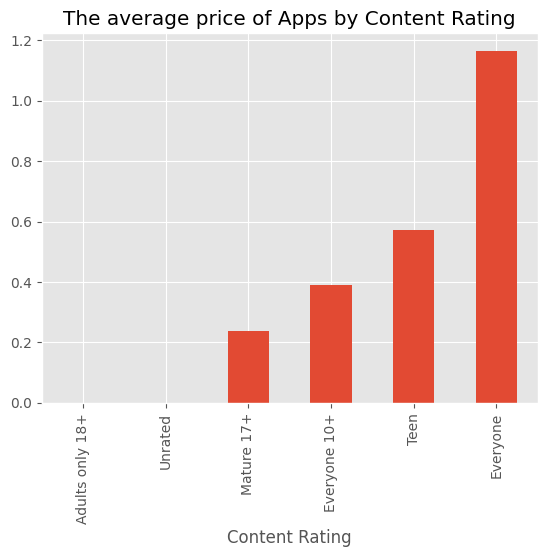

In [186]:
df1.groupby('Content Rating')['Price'].mean().sort_values().plot.bar(title='The average price of Apps by Content Rating')